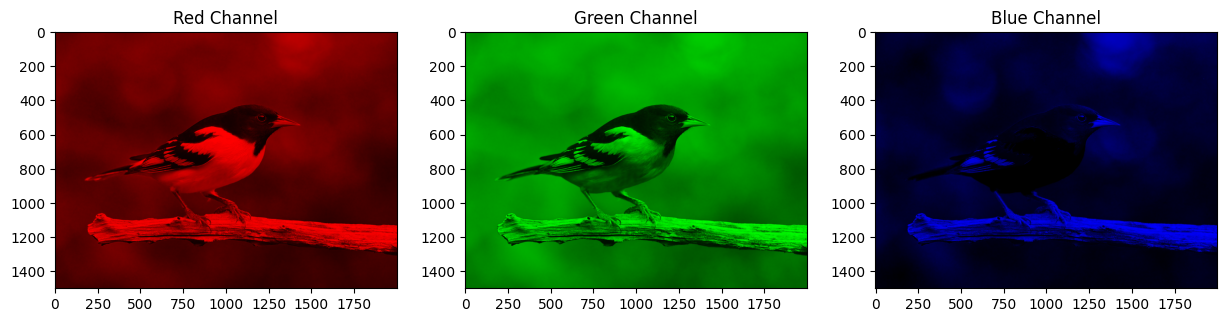

In [ ]:
#cau1
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Đọc ảnh (thay 'input_image.jpg' bằng đường dẫn ảnh của bạn)
image = cv2.imread('bird.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển từ BGR sang RGB để hiển thị đúng màu

# Tạo 3 ảnh với các kênh màu khác nhau
red_image = image.copy()
red_image[:, :, 1] = 0  # Xóa kênh xanh lá
red_image[:, :, 2] = 0  # Xóa kênh xanh dương

green_image = image.copy()
green_image[:, :, 0] = 0  # Xóa kênh đỏ
green_image[:, :, 2] = 0  # Xóa kênh xanh dương

blue_image = image.copy()
blue_image[:, :, 0] = 0  # Xóa kênh đỏ
blue_image[:, :, 1] = 0  # Xóa kênh xanh lá

# Lưu các ảnh
cv2.imwrite('red_image.jpg', cv2.cvtColor(red_image, cv2.COLOR_RGB2BGR))
cv2.imwrite('green_image.jpg', cv2.cvtColor(green_image, cv2.COLOR_RGB2BGR))
cv2.imwrite('blue_image.jpg', cv2.cvtColor(blue_image, cv2.COLOR_RGB2BGR))

# Hiển thị ảnh (tùy chọn)
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(red_image), plt.title('Red Channel')
plt.subplot(132), plt.imshow(green_image), plt.title('Green Channel')
plt.subplot(133), plt.imshow(blue_image), plt.title('Blue Channel')
plt.show()

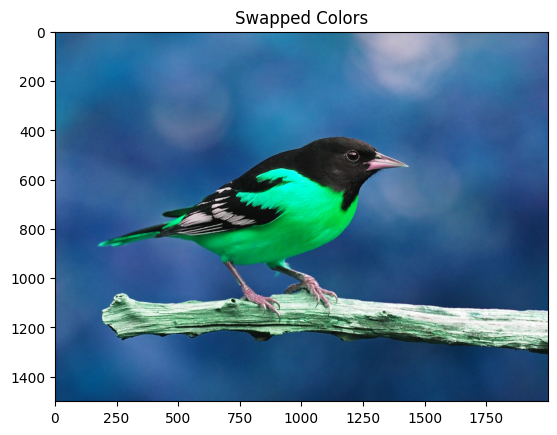

In [ ]:
#cau2
# Đọc ảnh
image = cv2.imread('bird.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hoán đổi kênh màu (ví dụ: R->G, G->B, B->R)
swapped_image = image.copy()
swapped_image[:, :, 0] = image[:, :, 2]  # R = B
swapped_image[:, :, 1] = image[:, :, 0]  # G = R
swapped_image[:, :, 2] = image[:, :, 1]  # B = G

# Lưu ảnh
cv2.imwrite('swapped_image.jpg', cv2.cvtColor(swapped_image, cv2.COLOR_RGB2BGR))

# Hiển thị ảnh
plt.imshow(swapped_image)
plt.title('Swapped Colors')
plt.show()

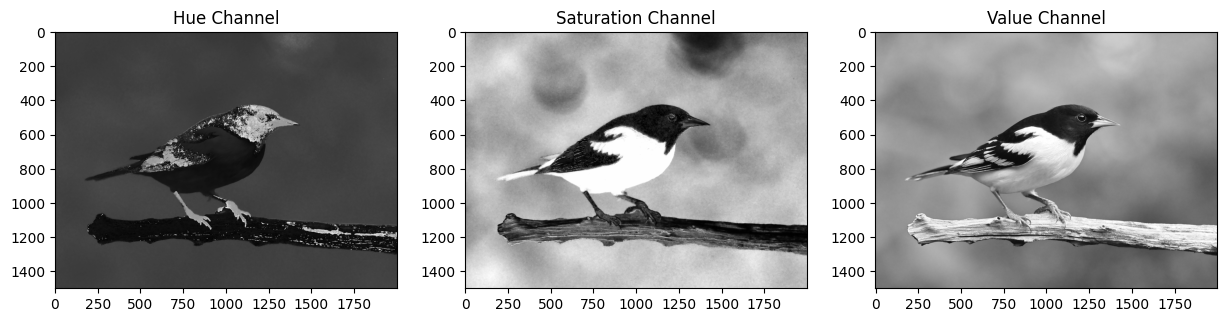

In [ ]:
#cau3
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Đọc ảnh
image = cv2.imread('bird.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Chuyển sang hệ màu HSV
hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Tách các kênh H, S, V
h_channel = hsv_image[:, :, 0]
s_channel = hsv_image[:, :, 1]
v_channel = hsv_image[:, :, 2]

# Lưu các kênh dưới dạng ảnh grayscale
cv2.imwrite('h_channel.jpg', h_channel)
cv2.imwrite('s_channel.jpg', s_channel)
cv2.imwrite('v_channel.jpg', v_channel)

# Hiển thị
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(h_channel, cmap='gray'), plt.title('Hue Channel')
plt.subplot(132), plt.imshow(s_channel, cmap='gray'), plt.title('Saturation Channel')
plt.subplot(133), plt.imshow(v_channel, cmap='gray'), plt.title('Value Channel')
plt.show()

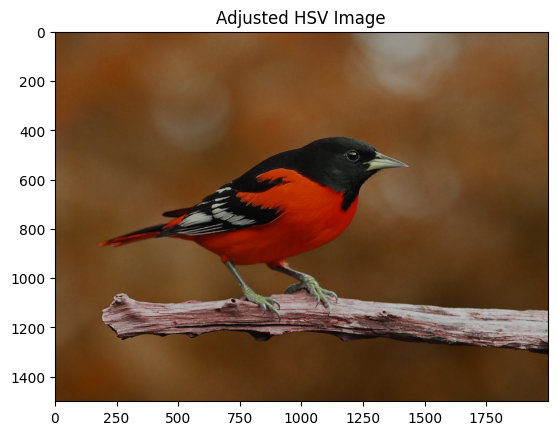

In [ ]:
#cau4
# # Đọc ảnh
image = cv2.imread('bird.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Chuyển sang HSV
hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Điều chỉnh H và V
hsv_image[:, :, 0] = hsv_image[:, :, 0] * (1/3)  # H_new = 1/3 H_old
hsv_image[:, :, 2] = hsv_image[:, :, 2] * (3/4)  # V_new = 3/4 V_old

# Chuyển lại RGB
adjusted_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

# Lưu ảnh
cv2.imwrite('adjusted_hsv_image.jpg', cv2.cvtColor(adjusted_image, cv2.COLOR_RGB2BGR))

# Hiển thị
plt.imshow(adjusted_image)
plt.title('Adjusted HSV Image')
plt.show()

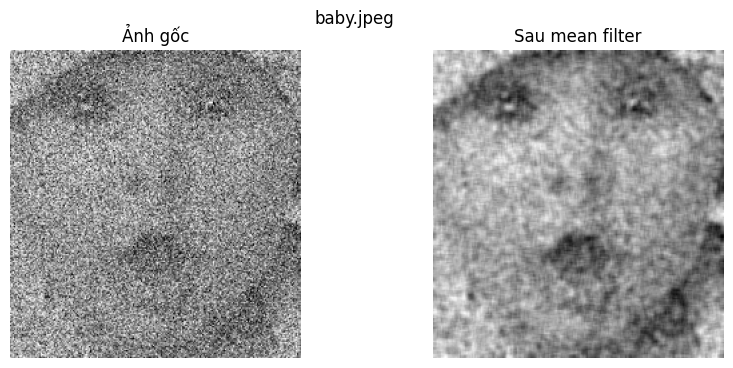

✔ Đã lưu ảnh lọc mean: D:\XLA_lab1\exercise\output_mean_filter\mean_filtered_baby.jpeg


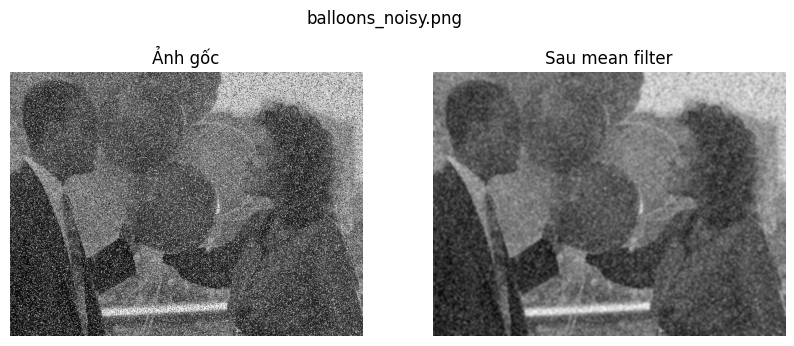

✔ Đã lưu ảnh lọc mean: D:\XLA_lab1\exercise\output_mean_filter\mean_filtered_balloons_noisy.png


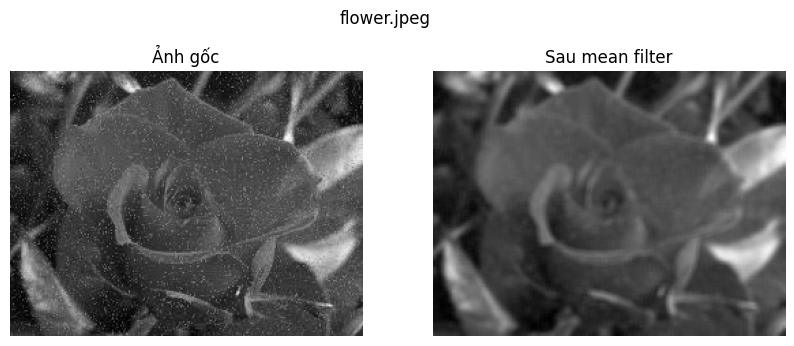

✔ Đã lưu ảnh lọc mean: D:\XLA_lab1\exercise\output_mean_filter\mean_filtered_flower.jpeg


In [ ]:
#cau5
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import os

# Thư mục ảnh gốc
image_folder = 'D:\\XLA_lab1\\exercise'
image_files = ['baby.jpeg', 'balloons_noisy.png', 'flower.jpeg']

# Tạo thư mục xuất ảnh kết quả
output_folder = os.path.join(image_folder, 'output_mean_filter')
os.makedirs(output_folder, exist_ok=True)

# Duyệt qua từng ảnh trong danh sách
for file_name in image_files:
    image_path = os.path.join(image_folder, file_name)

    # Đọc ảnh và chuyển sang ảnh xám
    try:
        a = iio.imread(image_path, mode='L').astype(np.uint8)
    except Exception as e:
        print(f"[!] Lỗi đọc ảnh: {image_path} - {e}")
        continue

    # Áp dụng mean filter với kernel size = 5
    b = nd.uniform_filter(a, size=5, mode='reflect')

    # Lưu kết quả
    out_path = os.path.join(output_folder, f'mean_filtered_{file_name}')
    iio.imwrite(out_path, b)

    # Hiển thị ảnh
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(a, cmap='gray')
    plt.title("Ảnh gốc")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(b, cmap='gray')
    plt.title("Sau mean filter")
    plt.axis("off")

    plt.suptitle(file_name)
    plt.show()

    print(f"✔ Đã lưu ảnh lọc mean: {out_path}")


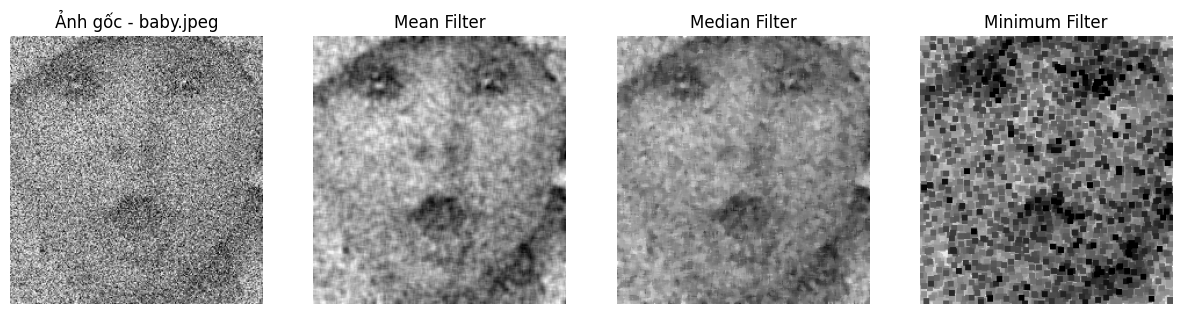

✔ Đã lưu các ảnh khử nhiễu cho baby.jpeg
Nhận xét: Median filter thường khử nhiễu tốt nhất vì giữ được chi tiết biên tốt hơn mean và minimum.


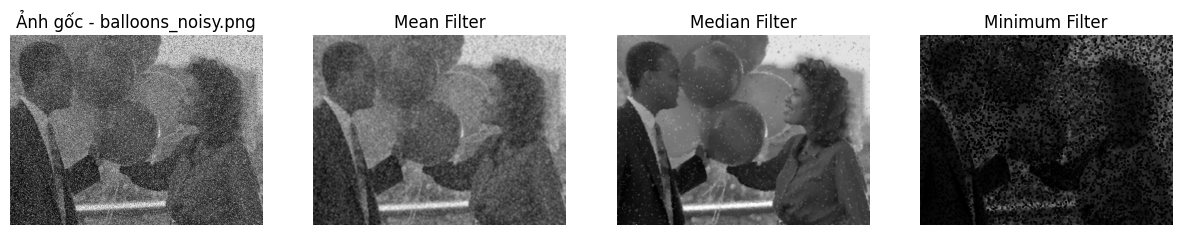

✔ Đã lưu các ảnh khử nhiễu cho balloons_noisy.png
Nhận xét: Median filter thường khử nhiễu tốt nhất vì giữ được chi tiết biên tốt hơn mean và minimum.


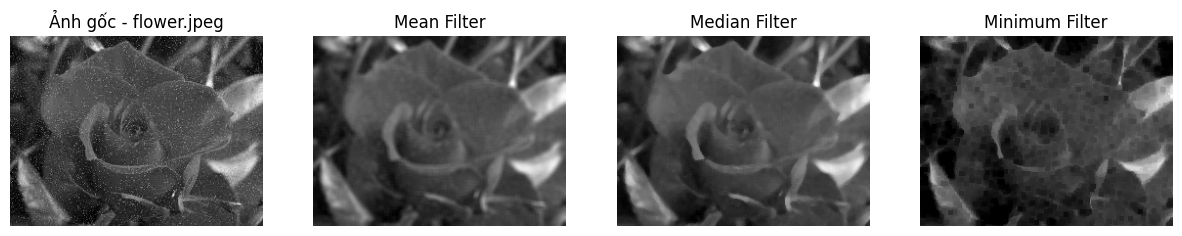

✔ Đã lưu các ảnh khử nhiễu cho flower.jpeg
Nhận xét: Median filter thường khử nhiễu tốt nhất vì giữ được chi tiết biên tốt hơn mean và minimum.


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Thư mục ảnh gốc
image_folder = 'D:\\XLA_lab1\\exercise'
image_files = ['baby.jpeg', 'balloons_noisy.png', 'flower.jpeg']

# Tạo thư mục xuất ảnh kết quả
output_folder = os.path.join(image_folder, 'output')
os.makedirs(output_folder, exist_ok=True)
# Câu 6

for file_name in image_files:
    image_path = os.path.join(image_folder, file_name)
    a = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Áp dụng các bộ lọc khử nhiễu
    mean_filtered = cv2.blur(a, (5, 5))  # Mean filter
    median_filtered = cv2.medianBlur(a, 5)  # Median filter
    min_filtered = cv2.erode(a, np.ones((5, 5), np.uint8))  # Minimum filter
    
    # Lưu kết quả
    cv2.imwrite(os.path.join(output_folder, f'mean_filtered_{file_name}'), mean_filtered)
    cv2.imwrite(os.path.join(output_folder, f'median_filtered_{file_name}'), median_filtered)
    cv2.imwrite(os.path.join(output_folder, f'min_filtered_{file_name}'), min_filtered)
    
    # Hiển thị để so sánh
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(a, cmap='gray')
    plt.title(f'Ảnh gốc - {file_name}')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(mean_filtered, cmap='gray')
    plt.title('Mean Filter')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(median_filtered, cmap='gray')
    plt.title('Median Filter')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(min_filtered, cmap='gray')
    plt.title('Minimum Filter')
    plt.axis('off')
    
    plt.show()
    print(f"✔ Đã lưu các ảnh khử nhiễu cho {file_name}")
    print("Nhận xét: Median filter thường khử nhiễu tốt nhất vì giữ được chi tiết biên tốt hơn mean và minimum.")

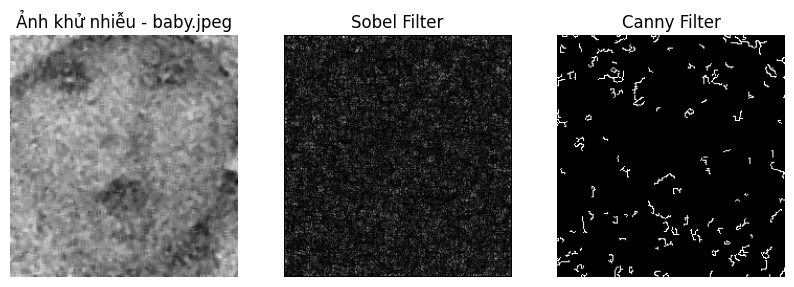

✔ Đã lưu các ảnh xác định biên cho baby.jpeg


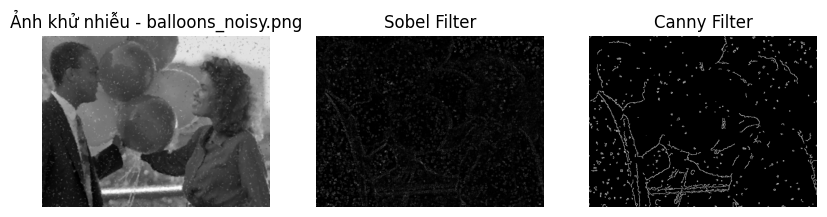

✔ Đã lưu các ảnh xác định biên cho balloons_noisy.png


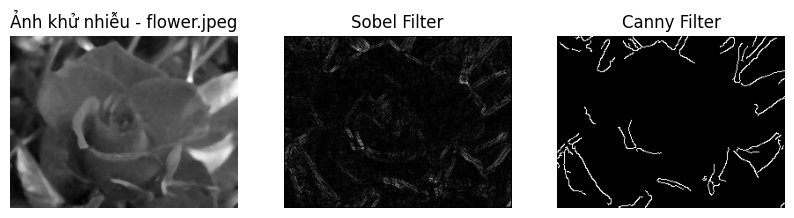

✔ Đã lưu các ảnh xác định biên cho flower.jpeg


In [6]:
# Câu 7: Sử dụng các filter xác định biên (khử nhiễu trước)
for file_name in image_files:
    image_path = os.path.join(image_folder, file_name)
    a = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Khử nhiễu trước
    denoised = cv2.medianBlur(a, 5)  # Dùng median filter để khử nhiễu
    
    # Áp dụng các bộ lọc xác định biên
    sobel = cv2.Sobel(denoised, cv2.CV_64F, 1, 1, ksize=3)
    sobel = cv2.convertScaleAbs(sobel)  # Chuyển về uint8
    canny = cv2.Canny(denoised, 100, 200)
    
    # Lưu kết quả
    cv2.imwrite(os.path.join(output_folder, f'sobel_{file_name}'), sobel)
    cv2.imwrite(os.path.join(output_folder, f'canny_{file_name}'), canny)
    
    # Hiển thị
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(denoised, cmap='gray')
    plt.title(f'Ảnh khử nhiễu - {file_name}')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(sobel, cmap='gray')
    plt.title('Sobel Filter')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(canny, cmap='gray')
    plt.title('Canny Filter')
    plt.axis('off')
    
    plt.show()
    print(f"✔ Đã lưu các ảnh xác định biên cho {file_name}")

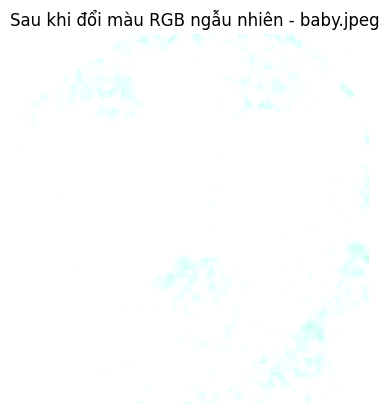

✔ Đã lưu ảnh đổi màu RGB ngẫu nhiên: D:\XLA_lab1\exercise\output\rgb_random_baby.jpeg


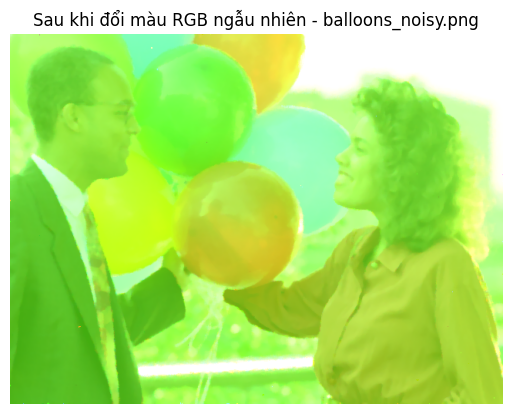

✔ Đã lưu ảnh đổi màu RGB ngẫu nhiên: D:\XLA_lab1\exercise\output\rgb_random_balloons_noisy.png


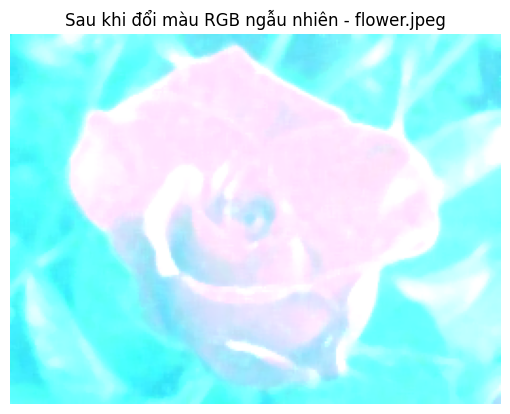

✔ Đã lưu ảnh đổi màu RGB ngẫu nhiên: D:\XLA_lab1\exercise\output\rgb_random_flower.jpeg


In [10]:
#Câu 8
import random


for file_name in image_files:
    image_path = os.path.join(image_folder, file_name)
    a = cv2.imread(image_path)
    
    # Khử nhiễu trước
    denoised = cv2.medianBlur(a, 5)
    
    # Tạo giá trị màu ngẫu nhiên cho RGB
    random_b = random.randint(0, 255)
    random_g = random.randint(0, 255)
    random_r = random.randint(0, 255)
    modified_rgb = np.zeros_like(denoised)
    modified_rgb[:, :, 0] = cv2.add(denoised[:, :, 0], random_b % 256)  # Kênh xanh dương
    modified_rgb[:, :, 1] = cv2.add(denoised[:, :, 1], random_g % 256)  # Kênh xanh lá
    modified_rgb[:, :, 2] = cv2.add(denoised[:, :, 2], random_r % 256)  # Kênh đỏ
    modified_rgb = np.clip(modified_rgb, 0, 255).astype(np.uint8)
    
    # Lưu kết quả
    out_path = os.path.join(output_folder, f'rgb_random_{file_name}')
    cv2.imwrite(out_path, modified_rgb)
    
    # Hiển thị
    plt.imshow(cv2.cvtColor(modified_rgb, cv2.COLOR_BGR2RGB))
    plt.title(f'Sau khi đổi màu RGB ngẫu nhiên - {file_name}')
    plt.axis('off')
    plt.show()
    print(f"✔ Đã lưu ảnh đổi màu RGB ngẫu nhiên: {out_path}")

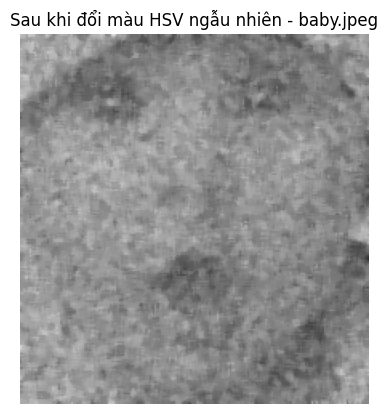

✔ Đã lưu ảnh đổi màu HSV ngẫu nhiên: D:\XLA_lab1\exercise\output\hsv_random_baby.jpeg


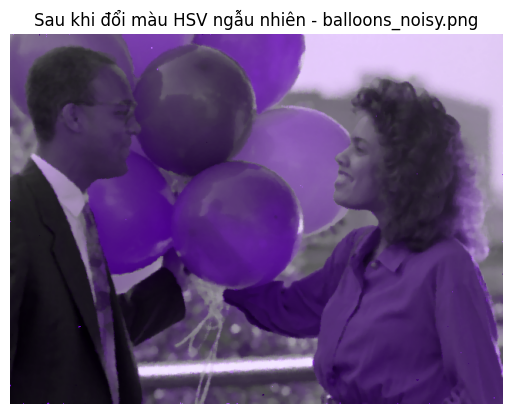

✔ Đã lưu ảnh đổi màu HSV ngẫu nhiên: D:\XLA_lab1\exercise\output\hsv_random_balloons_noisy.png


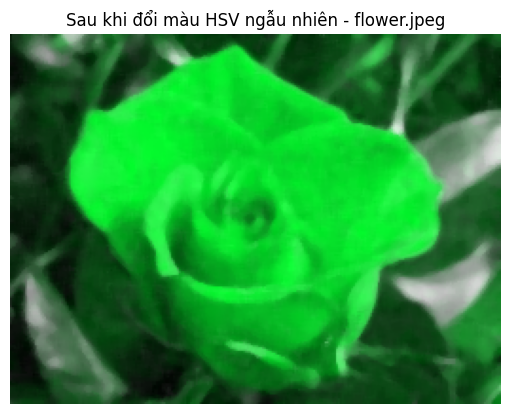

✔ Đã lưu ảnh đổi màu HSV ngẫu nhiên: D:\XLA_lab1\exercise\output\hsv_random_flower.jpeg


In [11]:
# Câu 9: Giảm độ phân giải cường độ (0xc0 và 0x80)
for file_name in image_files:
    image_path = os.path.join(image_folder, file_name)
    a = cv2.imread(image_path)
    
    # Khử nhiễu trước
    denoised = cv2.medianBlur(a, 5)
    
    # Chuyển sang HSV
    hsv = cv2.cvtColor(denoised, cv2.COLOR_BGR2HSV)
    
    # Tạo giá trị Hue ngẫu nhiên và giữ Saturation, Value
    random_hue = random.randint(0, 179)  # Hue trong OpenCV từ 0-179
    hsv[:, :, 0] = random_hue  # Thay đổi Hue ngẫu nhiên
    rgb_new = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    # Lưu kết quả
    out_path = os.path.join(output_folder, f'hsv_random_{file_name}')
    cv2.imwrite(out_path, rgb_new)
    
    # Hiển thị
    plt.imshow(cv2.cvtColor(rgb_new, cv2.COLOR_BGR2RGB))
    plt.title(f'Sau khi đổi màu HSV ngẫu nhiên - {file_name}')
    plt.axis('off')
    plt.show()
    print(f"✔ Đã lưu ảnh đổi màu HSV ngẫu nhiên: {out_path}")